In [1]:
import sys
sys.path.append('../')

import torch
import random
import math
import scienceplots
import matplotlib

from ring import *
from exponential_graph import *
from one_peer_exponential_graph import *
from adic_graph import *
from torus import *
from one_peer_undirected_equidyn import *
from one_peer_directed_equidyn import *

import pickle
from matplotlib import rc

In [2]:
torch.set_default_dtype(torch.float64)
rc('text', usetex=True)

# 論文用の図

In [45]:
#plt.style.use(['science','ieee'])

n_nodes_list = [1500]
seed = 0

diff = {}

for n_nodes in n_nodes_list:
    print(n_nodes)
    torch.manual_seed(seed)
    init_x = torch.randn(n_nodes)
    mean_x = init_x.sum() / n_nodes

    graphs = {"Ring": Ring(n_nodes), "Torus": Torus(30,50), "Exp.": ExponentialGraph(n_nodes), "1-peer Exp.": OnePeerExponentialGraph(n_nodes), "1-peer D-EquiDyn.": OnePeerDirectedEquiDyn(n_nodes, seed=seed), "1-peer U-EquiDyn.": OnePeerUndirectedEquiDyn(n_nodes, seed=seed), "1-peer ADIC": AdicGraph(n_nodes, seed=seed), "2-peer ADIC": AdicGraph(n_nodes, max_degree=2, seed=seed), "3-peer ADIC": AdicGraph(n_nodes, max_degree=3, seed=seed), "4-peer ADIC": AdicGraph(n_nodes, max_degree=4, seed=seed)}

    diff[n_nodes] = {}

    for g_name in graphs:
        print(g_name)
        x = init_x.clone()
        g = graphs[g_name]
        diff[n_nodes][g_name] = [torch.norm(x - mean_x)**2 / n_nodes]
    
        for _ in range(100):
            x = g.get_w().matmul(x)
            diff[n_nodes][g_name].append(torch.norm(x - mean_x)**2 / n_nodes)

1500
Ring
Torus
Exp.
1-peer Exp.
1-peer D-EquiDyn.
1-peer U-EquiDyn.
1-peer ADIC
2-peer ADIC
3-peer ADIC
4-peer ADIC


In [19]:
colors = ["" for _ in range(10)]

colors[0] = "black"
colors[1] = "skyblue"
colors[2] = "green"
colors[3] = "red"
colors[4] = "orange"
colors[5] = "gold"

colors[6] = "blue"
colors[7] = "blue"
colors[8] = "blue"
colors[9] = "blue"


In [4]:
#pickle.dump(diff, open("../results_consensus/1500.pk", "wb"))
diff = pickle.load(open("../results_consensus/1500.pk", "rb"))

In [5]:
keys = diff[1500].keys()
keys = ['Exp.', 'Ring', 'Torus', '1-peer Exp.', '1-peer D-EquiDyn.', '1-peer U-EquiDyn.', '1-peer ADIC', '2-peer ADIC', '3-peer ADIC', '4-peer ADIC']
print(keys)

['Exp.', 'Ring', 'Torus', '1-peer Exp.', '1-peer D-EquiDyn.', '1-peer U-EquiDyn.', '1-peer ADIC', '2-peer ADIC', '3-peer ADIC', '4-peer ADIC']


Exp. Exp. (11)
Ring Ring (2)
Torus Torus (4)
1-peer Exp. 1-peer Exp. (1)
1-peer D-EquiDyn. 1-peer D-EquiDyn (1)
1-peer U-EquiDyn. 1-peer U-EquiDyn (1)
1-peer ADIC 1-peer FAIRY (1)
2-peer ADIC 2-peer FAIRY (2)
3-peer ADIC 3-peer FAIRY (3)
4-peer ADIC 4-peer FAIRY (4)


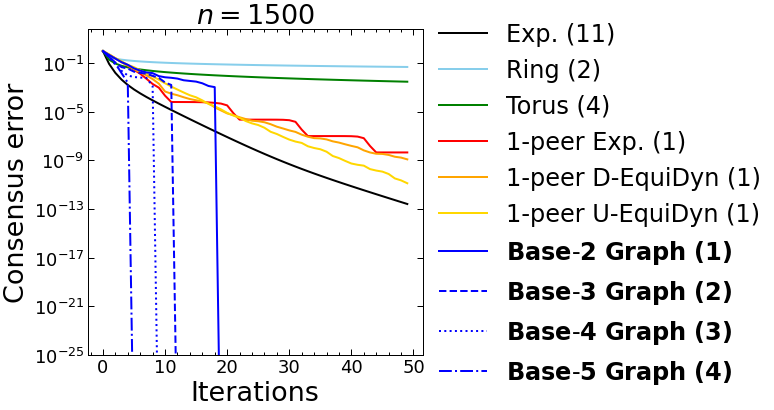

In [6]:
plt.style.use(['science', 'notebook'])


labels = ["Exp. (11)", "Ring (2)", "Torus (4)", "1-peer Exp. (1)", "1-peer D-EquiDyn (1)", "1-peer U-EquiDyn (1)", "1-peer FAIRY (1)", "2-peer FAIRY (2)", "3-peer FAIRY (3)", "4-peer FAIRY (4)"]
plt.figure(figsize=(6,6))

plt.subplots_adjust(wspace=0.4)

for i in range(1):
    n_nodes = 1500
    ax = plt.subplot(1, 1, i+1)
    

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
        
    for g_name, label, color in zip(keys, labels, colors):
        print(g_name, label)
        if g_name =="1-peer ADIC":
            plt.plot(diff[n_nodes][g_name][:50], label="$\\bf{Base}$-$\\bf{2}$ $\\bf{Graph}$ $\\bf{(1)}$", color=color, lw=2.0)
        elif g_name =="2-peer ADIC":
            plt.plot(diff[n_nodes][g_name][:50], label="$\\bf{Base}$-$\\bf{3}$ $\\bf{Graph}$ $\\bf{(2)}$", color=color, lw=2.0, ls="dashed")
        elif g_name =="3-peer ADIC":
            plt.plot(diff[n_nodes][g_name][:50], label="$\\bf{Base}$-$\\bf{4}$ $\\bf{Graph}$ $\\bf{(3)}$", color=color, lw=2.0, ls="dotted")
        elif g_name =="4-peer ADIC":
            plt.plot(diff[n_nodes][g_name][:50], label="$\\bf{Base}$-$\\bf{5}$ $\\bf{Graph}$ $\\bf{(4)}$", color=color, lw=2.0, ls="dashdot")
        else:
            plt.plot(diff[n_nodes][g_name][:50], label=label, color=color, lw=2)
        
        #plt.plot(diff[n_nodes][g_name][:50], label=g_name, lw=2.0)
        
    plt.title(f"$n={n_nodes}$", fontsize=27)
    plt.yscale("log")
    plt.ylabel("Consensus error", fontsize=27)
    plt.xlabel("Iterations", fontsize=27)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.ylim(ymin=10**(-25))
    
plt.legend(bbox_to_anchor=(1.02, 1.05), loc='upper left', borderaxespad=0, fontsize=24)
plt.savefig(f"../pic/consensus_1500.pdf", bbox_inches='tight', dpi=75)

In [16]:
plt.style.use(['science','ieee'])

n_nodes_list = [100, 500, 1000]
torus_n_nodes_list = [(10, 10), (20, 25), (25, 40)]
seed = 0

diff = {}

for i in range(len(n_nodes_list)):
    n_nodes = n_nodes_list[i]
    
    print(n_nodes)
    torch.manual_seed(seed)
    init_x = torch.randn(n_nodes)
    mean_x = init_x.sum() / n_nodes

    graphs = {"Exp. (7,9,10)": ExponentialGraph(n_nodes), "Ring (2)": Ring(n_nodes), "Torus (4)": Torus(*torus_n_nodes_list[i]), "1-peer Exp. (1)": OnePeerExponentialGraph(n_nodes), "1-peer D-EquiDyn (1)": OnePeerDirectedEquiDyn(n_nodes, seed=seed), "1-peer U-EquiDyn (1)": OnePeerUndirectedEquiDyn(n_nodes, seed=seed), "Base-2 Graph (1)": AdicGraph(n_nodes, seed=seed), "Base-3 Graph (2)": AdicGraph(n_nodes, max_degree=2, seed=seed), "Base-4 Graph (3)": AdicGraph(n_nodes, max_degree=3, seed=seed),  "Base-5 Graph (4)": AdicGraph(n_nodes, max_degree=4, seed=seed)}

    diff[n_nodes] = {}

    for g_name in graphs:
        x = init_x.clone()
        g = graphs[g_name]
        diff[n_nodes][g_name] = [torch.norm(x - mean_x)**2 / n_nodes]
    
        for _ in range(100):
            x = g.get_w().matmul(x)
            diff[n_nodes][g_name].append(torch.norm(x - mean_x)**2 / n_nodes)

100
500
1000


In [17]:
matplotlib.colors.TABLEAU_COLORS


OrderedDict([('tab:blue', '#1f77b4'),
             ('tab:orange', '#ff7f0e'),
             ('tab:green', '#2ca02c'),
             ('tab:red', '#d62728'),
             ('tab:purple', '#9467bd'),
             ('tab:brown', '#8c564b'),
             ('tab:pink', '#e377c2'),
             ('tab:gray', '#7f7f7f'),
             ('tab:olive', '#bcbd22'),
             ('tab:cyan', '#17becf')])

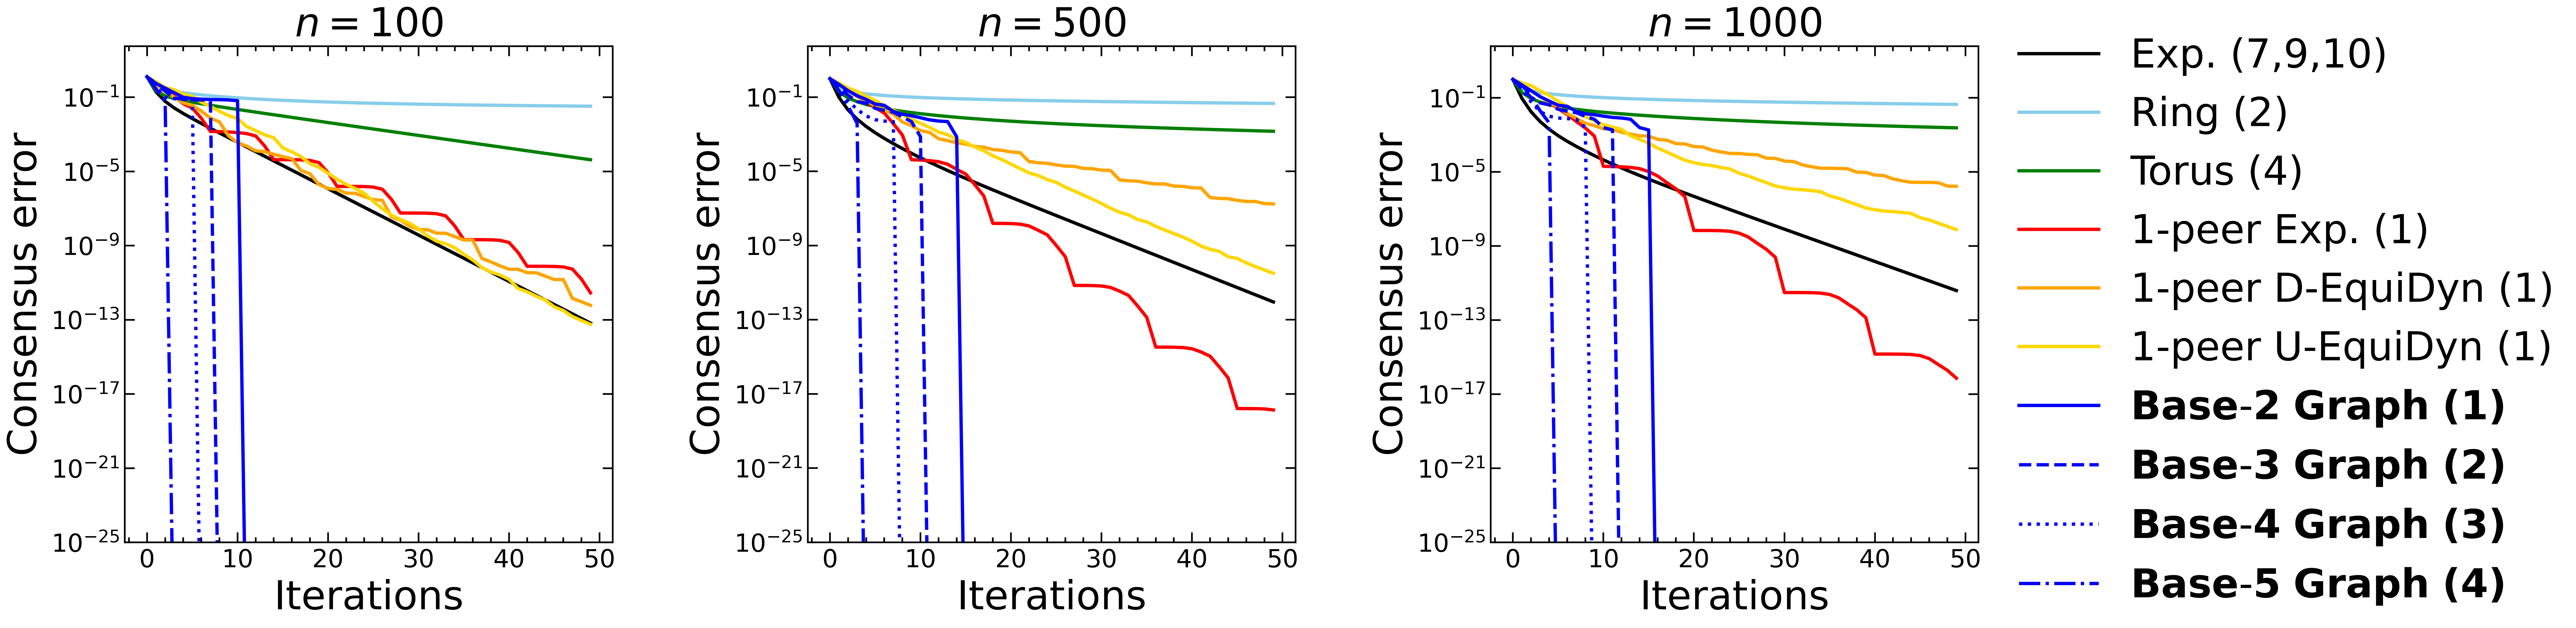

In [20]:
plt.style.use(['science', 'notebook'])

#colors = ["red", "brown", "orange", "yellow", "black", "pink", "blue", "blue", "blue"]
plt.figure(figsize=(5*4,5.5))

plt.subplots_adjust(wspace=0.4)

for i in range(len(n_nodes_list)):
    n_nodes = n_nodes_list[i]
    ax = plt.subplot(1, len(n_nodes_list), i+1)
    

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
        
    for g_name, color in zip(graphs, colors):
        
        """
        if g_name =="Base-3 Graph (2)":
            plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=1.75, ls="dashed", alpha=1.0)
        elif g_name =="Base-4 Graph (3)":
            plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=1.75, ls="dotted", alpha=1.0)
        elif g_name =="Base-5 Graph (4)":
            plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=1.75, ls="dashdot", alpha=1.0)
        else:
            plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=2, alpha=1.0)
        
        #plt.plot(diff[n_nodes][g_name][:50], label=g_name, lw=2.0)
        """
        if g_name == "Base-2 Graph (1)":
            plt.plot(diff[n_nodes][g_name][:50], label="$\\bf{Base}$-$\\bf{2}$ $\\bf{Graph}$ $\\bf{(1)}$", color=color, lw=2.0)
        elif g_name == "Base-3 Graph (2)":
            plt.plot(diff[n_nodes][g_name][:50], label="$\\bf{Base}$-$\\bf{3}$ $\\bf{Graph}$ $\\bf{(2)}$", color=color, lw=2.0, ls="dashed")
        elif g_name == "Base-4 Graph (3)":
            plt.plot(diff[n_nodes][g_name][:50], label="$\\bf{Base}$-$\\bf{4}$ $\\bf{Graph}$ $\\bf{(3)}$", color=color, lw=2.0, ls="dotted")
        elif g_name == "Base-5 Graph (4)":
            plt.plot(diff[n_nodes][g_name][:50], label="$\\bf{Base}$-$\\bf{5}$ $\\bf{Graph}$ $\\bf{(4)}$", color=color, lw=2.0, ls="dashdot")
        else:
            plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=2)
        
            
        
    plt.title(f"$n={n_nodes}$", fontsize=24)
    plt.yscale("log")
    plt.ylabel("Consensus error", fontsize=24)
    plt.xlabel("Iterations", fontsize=24)
    plt.ylim(ymin=10**(-25))
    
plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', borderaxespad=0, fontsize=24)
plt.savefig(f"../pic/consensus.pdf", bbox_inches='tight', dpi=75)

# nが2べきの時

In [10]:
#plt.style.use(['science','ieee'])

n_nodes_list = [2**7, 2**9, 2**10]
torus_n_nodes_list = [(2**3, 2**4), (2**4, 2**5), (2**5, 2**5)]
seed = 0

diff = {}

for i in range(len(n_nodes_list)):
    n_nodes = n_nodes_list[i]
    
    print(n_nodes)
    torch.manual_seed(seed)
    init_x = torch.randn(n_nodes)
    mean_x = init_x.sum() / n_nodes

    graphs = {"Exp. (7,9,10)": ExponentialGraph(n_nodes),"Ring (2)": Ring(n_nodes), "Torus (4)": Torus(*torus_n_nodes_list[i]), "1-peer Exp. (1)": OnePeerExponentialGraph(n_nodes), "1-peer D-EquiDyn (1)": OnePeerDirectedEquiDyn(n_nodes, seed=seed), "1-peer U-EquiDyn (1)": OnePeerUndirectedEquiDyn(n_nodes, seed=seed),  "Base-2 Graph (1)": AdicGraph(n_nodes, seed=seed), "Base-3 Graph (2)": AdicGraph(n_nodes, max_degree=2, seed=seed), "Base-4 Graph (3)": AdicGraph(n_nodes, max_degree=3, seed=seed),  "Base-5 Graph (4)": AdicGraph(n_nodes, max_degree=4, seed=seed)}

    diff[n_nodes] = {}

    for g_name in graphs:
        x = init_x.clone()
        g = graphs[g_name]
        diff[n_nodes][g_name] = [torch.norm(x - mean_x)**2 / n_nodes]
    
        for _ in range(100):
            x = g.get_w().matmul(x)
            diff[n_nodes][g_name].append(torch.norm(x - mean_x)**2 / n_nodes)

128
512
1024


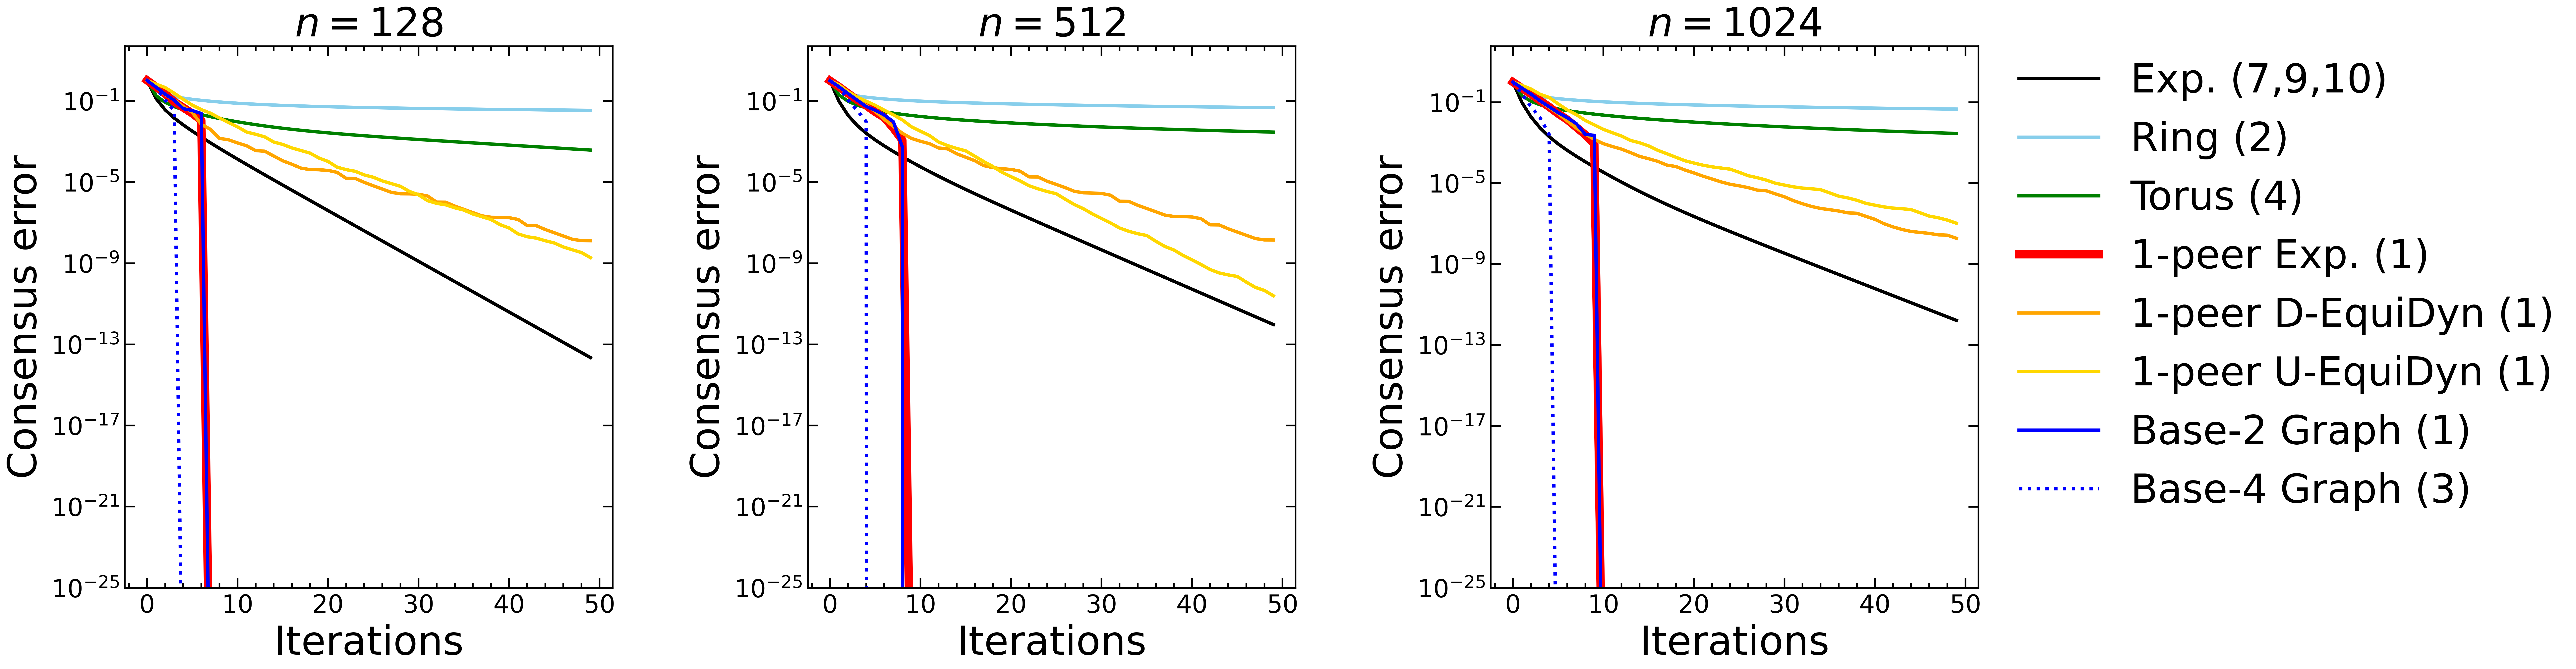

In [11]:
plt.style.use(['science', 'notebook'])

#colors = ["red", "brown", "orange", "yellow", "black", "pink", "blue", "blue", "blue"]
plt.figure(figsize=(5*4,6))

plt.subplots_adjust(wspace=0.4)

for i in range(len(n_nodes_list)):
    n_nodes = n_nodes_list[i]
    ax = plt.subplot(1, len(n_nodes_list), i+1)
    

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
        
    for g_name, color in zip(graphs, colors):
    
        if g_name =="Base-3 Graph (2)" or g_name=="Base-5 Graph (4)":
            pass
            #plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=1.5, ls="dashed")
        elif g_name =="Base-4 Graph (3)":
            plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=2, ls="dotted", alpha=1.0)
        elif g_name == "1-peer Exp. (1)":
            plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=5, alpha=1.0)  
        else:
            plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=2, alpha=1.0)
        
        #plt.plot(diff[n_nodes][g_name][:50], label=g_name, lw=2.0)
        
    plt.title(f"$n={n_nodes}$", fontsize=24)
    plt.yscale("log")
    plt.ylabel("Consensus error", fontsize=24)
    plt.xlabel("Iterations", fontsize=24)
    plt.ylim(ymin=10**(-25))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=24)
plt.savefig(f"../pic/consensus_with_power_of_two.pdf", bbox_inches='tight', dpi=75)

# n=21, 22, ..., 25のとき

In [12]:
colors = ["" for _ in range(10)]

colors[0] = "black"
colors[1] = "red"

colors[2] = "blue"
colors[3] = "blue"
colors[4] = "blue"
colors[5] = "blue"


In [13]:
plt.style.use(['science','ieee'])

n_nodes_list = [21, 22, 23, 24, 25]
seed = 0

diff = {}

for i in range(len(n_nodes_list)):
    n_nodes = n_nodes_list[i]
    
    print(n_nodes)
    torch.manual_seed(seed)
    init_x = torch.randn(n_nodes)
    mean_x = init_x.sum() / n_nodes

    graphs = {"Exp. (5)": ExponentialGraph(n_nodes), "1-peer Exp. (1)": OnePeerExponentialGraph(n_nodes), "Base-2 Graph (1)": AdicGraph(n_nodes, seed=seed), "Base-3 Graph (2)": AdicGraph(n_nodes, max_degree=2, seed=seed), "Base-4 Graph (3)": AdicGraph(n_nodes, max_degree=3, seed=seed),  "Base-5 Graph (4)": AdicGraph(n_nodes, max_degree=4, seed=seed)}

    diff[n_nodes] = {}

    for g_name in graphs:
        x = init_x.clone()
        g = graphs[g_name]
        diff[n_nodes][g_name] = [torch.norm(x - mean_x)**2 / n_nodes]
    
        for _ in range(100):
            x = g.get_w().matmul(x)
            diff[n_nodes][g_name].append(torch.norm(x - mean_x)**2 / n_nodes)

21
22
23
24
25


In [14]:
plt.style.use(['science', 'notebook'])

#colors = ["red", "brown", "orange", "yellow", "black", "pink", "blue", "blue", "blue"]
plt.figure(figsize=(6*4, 6*2))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(len(n_nodes_list)):
    n_nodes = n_nodes_list[i]
    ax = plt.subplot(2, 3, i+1)
    

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
        
    for g_name, color in zip(graphs, colors):
        
        """
        if g_name =="Base-3 Graph (2)":
            plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=1.75, ls="dashed", alpha=1.0)
        elif g_name =="Base-4 Graph (3)":
            plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=1.75, ls="dotted", alpha=1.0)
        elif g_name =="Base-5 Graph (4)":
            plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=1.75, ls="dashdot", alpha=1.0)
        else:
            plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=2, alpha=1.0)
        
        #plt.plot(diff[n_nodes][g_name][:50], label=g_name, lw=2.0)
        """
        if g_name == "Base-2 Graph (1)":
            plt.plot(diff[n_nodes][g_name][:50], label="$\\bf{Base}$-$\\bf{2}$ $\\bf{Graph}$ $\\bf{(1)}$", color=color, lw=2.0)
        elif g_name == "Base-3 Graph (2)":
            plt.plot(diff[n_nodes][g_name][:50], label="$\\bf{Base}$-$\\bf{3}$ $\\bf{Graph}$ $\\bf{(2)}$", color=color, lw=2.0, ls="dashed")
        elif g_name == "Base-4 Graph (3)":
            plt.plot(diff[n_nodes][g_name][:50], label="$\\bf{Base}$-$\\bf{4}$ $\\bf{Graph}$ $\\bf{(3)}$", color=color, lw=2.0, ls="dotted")
        elif g_name == "Base-5 Graph (4)":
            plt.plot(diff[n_nodes][g_name][:50], label="$\\bf{Base}$-$\\bf{5}$ $\\bf{Graph}$ $\\bf{(4)}$", color=color, lw=2.0, ls="dashdot")
        else:
            plt.plot(diff[n_nodes][g_name][:50], label=g_name, color=color, lw=2)
        
            
        
    plt.title(f"$n={n_nodes}$", fontsize=24)
    plt.yscale("log")
    plt.ylabel("Consensus error", fontsize=24)
    plt.xlabel("Iterations", fontsize=24)
    plt.ylim(ymin=10**(-25))
    
plt.legend(bbox_to_anchor=(1.05, 1.1), loc='upper left', borderaxespad=0, fontsize=24)
plt.savefig(f"../pic/consensus_n_22_23_24_25.pdf", bbox_inches='tight', dpi=75)